# Exploratory Data Analysis

In [482]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

We begin by importing our tidied dataset.

In [483]:
# Import tidied data set
CITES = pd.read_csv("Datasets/CITES.csv", index_col = 0)

# Check that it has imported correctly
CITES.head(3)

,Year,Taxon,Importer,Exporter,Origin,Term,Unit,Quantity,Region,Number,Purpose
0,1977,Manis pentadactyla,AU,CN,NaN,live,NaN,2.0,Asian,2.0,whole
1,1978,Manis crassicaudata,US,JP,XX,skins,NaN,298.0,Asian,298.0,skins
2,1978,Manis javanica,US,JP,XX,skins,NaN,1016.0,Asian,1016.0,skins


This data frame should contain 11 columns, from `Year` to `Purpose`.  Please check that it has loaded correctly before continuing.

### Overview of Importer and Exporter Trends

Let us examine the biggest importer and exporter countries, by volume of pangolin products traded and by frequency of trade.

In [484]:
# Group quantity data by importer and exporter
import_vol = CITES.groupby(['Importer'])['Number'].sum()
export_vol = CITES.groupby(['Exporter'])['Number'].sum()

# Find maximums
import_max = np.argmax(import_vol)
export_max = np.argmax(export_vol)

# Print results
print('Largest importer by volume:', import_vol.index[import_max], ', Volume:', int(import_vol.iloc[import_max]))
print('Largest exporter by volume:', export_vol.index[export_max], ', Volume:', int(export_vol.iloc[export_max]))

Largest importer by volume: US , Volume: 323028
Largest exporter by volume: SG , Volume: 160368


The largest importer of pangolin products by number of pangolins traded is the United States, and the largest exporter is Singapore. 

In [486]:
# Frequency tables of importers and exporters
import_freq = CITES['Importer'].value_counts()
export_freq = CITES['Exporter'].value_counts()

# Find maximums
import_max2 = np.argmax(import_freq)
export_max2 = np.argmax(export_freq)

# Print results
print('Largest importer by frequency:', import_freq.index[import_max2], ', Volume:', int(import_freq.iloc[import_max2]))
print('Largest exporter by frequency:', export_freq.index[export_max2], ', Volume:', int(export_freq.iloc[export_max2]))

Largest importer by frequency: US , Volume: 669
Largest exporter by frequency: JP , Volume: 156


The United States is again the largest importer, with a recorded 669 transactions.  The largest exporter is Japan.  

### Trends by Region

According to a report for the 66th CITES Standing Committee meeting (IUCN SSC Pangolin Specialist Group, 2016), as restrictions have strengthened for the trade of Asian pangolin species and Asian pangolin populations have declined, there has been an increase in the trade of African pangolins to meet the demand. Let us plot the total recorded number of pangolins traded according to region to examine this claim. 

In [487]:
# Group data by region and year 
CITES_reg = CITES.groupby(['Region', 'Year'])['Number'].sum()
CITES_reg = CITES_reg[['Asian', 'African']]

# List of regions and colours to use
regions = ['Asian', 'African']
colours_reg = ['cornflowerblue', 'coral']

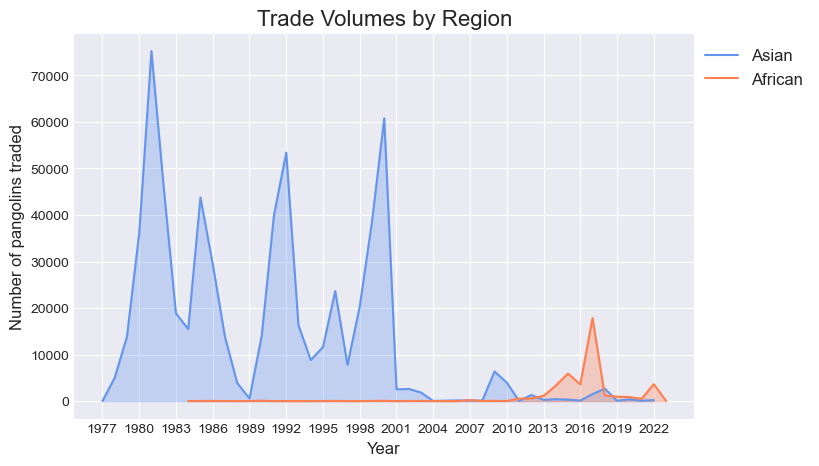

In [488]:
# Plot comparison
plt.figure(figsize = (8,5))
for r in range(0,len(regions)):
    plt.plot(CITES_reg[regions[r]], color = colours_reg[r], label = regions[r])
    plt.fill_between(CITES_reg[regions[r]].index, CITES_reg[regions[r]], color = colours_reg[r], alpha = 0.3)
plt.title('Trade Volumes by Region', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of pangolins traded', fontsize = 12)
plt.legend(frameon = False, bbox_to_anchor = (1.2, 1), fontsize = 12)
plt.xticks(np.arange(min(CITES['Year']), max(CITES['Year'])+1, 3))
plt.style.use('seaborn-v0_8-darkgrid')
plt.savefig('Images/african_vs_asian_line.png', bbox_inches = 'tight')

There is a drastic decrease in the reported trade of Asian pangolin species around the year 2000.  It was during this year that a zero export quota for wild-caught Asian pangolins came into effect (IUCN SSC Pangolin Specialist Group, 2016).  There is a clear increase in trade in African pangolin species from around 2010, and for most of the subsequent years there were more African pangolins traded than Asian.  This confirms the assertions made in the document for CITES (IUCN SSC Pangolin Specialist Group, 2016).  However, the trade in African pangolins does not reach the same volumes as the pre-2000 trade in Asian pangolins. 

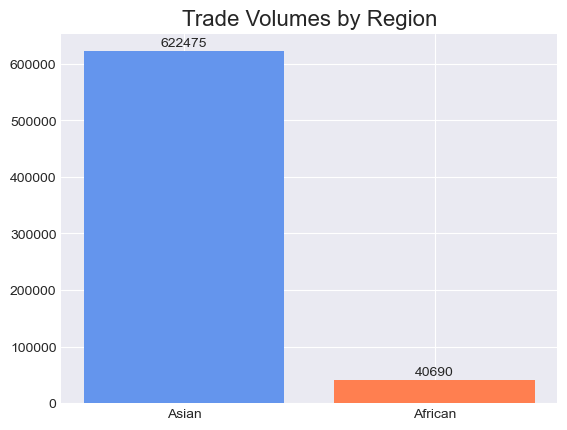

In [489]:
# Save value of totals by region
total_reg = CITES_reg.groupby(['Region']).sum()[::-1]

# Set an offset to lift the label above the bar
offset = 8000

# Bar plot of total pangolins poached by region
plt.bar(regions, total_reg, color = colours_reg)
plt.title('Trade Volumes by Region', fontsize = 16)

# Add labels to each bar
for i, total in enumerate(total_reg):
  plt.text(total_reg.index[i], total + offset, round(total), ha = 'center')

# Save image
plt.savefig('Images/african_vs_asian_bar.png', bbox_inches = 'tight')

Just over 600 000 Asian pangolins have been traded since 1977.  This dwarfs the numbers for African pangolins, which is not even 50 000.  

### Trends by Purpose

Let us examine which type of pangolin products are the most popular.

In [490]:
# Group data by purpose and year 
CITES_pur = CITES.groupby(['Purpose', 'Year'])['Number'].sum()

# List of purposes and colours to use
purposes = sorted(CITES['Purpose'].unique())
titles_pur = ['Consumption', 'Derivatives', 'Medicine', 'Skins and Skin Products', 'Trophies', 'Whole Specimens']
colours_pur = ['orchid', 'orangered', 'orange', 'olivedrab', 'lawngreen', 'midnightblue']

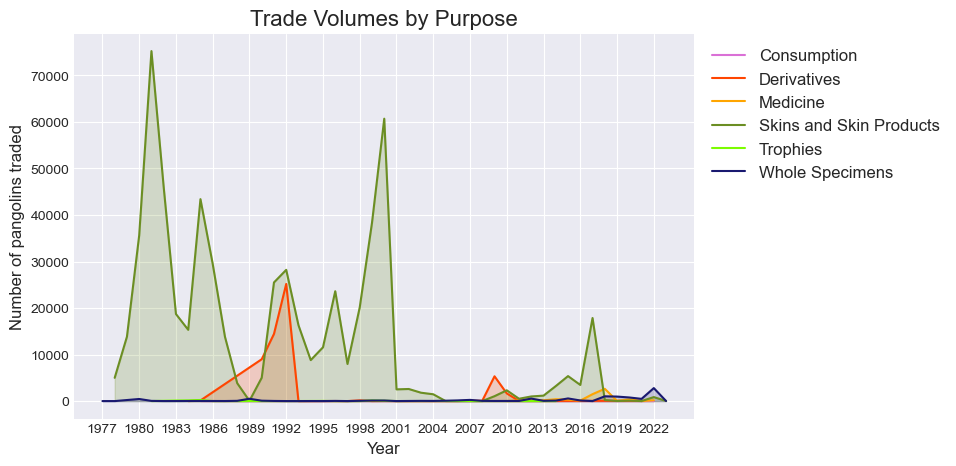

In [491]:
# Plot comparisons
plt.figure(figsize = (8,5))
for p in range(0, len(purposes)):
    plt.plot(CITES_pur[purposes[p]], color = colours_pur[p], label = titles_pur[p])
    plt.fill_between(CITES_pur[purposes[p]].index, CITES_pur[purposes[p]], color = colours_pur[p], alpha = 0.2)
plt.title('Trade Volumes by Purpose', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of pangolins traded', fontsize = 12)
plt.legend(frameon = False, bbox_to_anchor = (1.42, 1), fontsize = 12)
plt.xticks(np.arange(min(CITES['Year']), max(CITES['Year'])+1, 3))
plt.style.use('seaborn-v0_8-darkgrid')

While this plot is not very readable for the lower-volume purposes, it is clear that the most widely traded item by far is pangolin skins.  Recall that this category includes skins, scales, and all leather products.  Let us examine plots for each category separately as well.

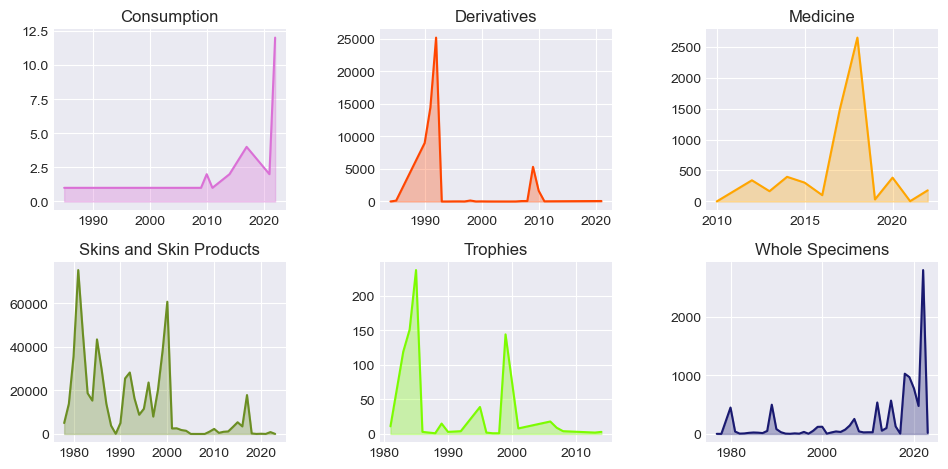

In [492]:
# Plots for each purpose
fig, axs = plt.subplots(2,3)
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].plot(CITES_pur[purposes[3*i+j]], color = colours_pur[3*i+j])
        axs[i,j].fill_between(CITES_pur[purposes[3*i+j]].index, CITES_pur[purposes[3*i+j]], color = colours_pur[3*i+j], alpha = 0.3)
        axs[i,j].set_title(titles_pur[3*i+j])
fig.tight_layout()
fig.set_figwidth(10)
plt.style.use('seaborn-v0_8-darkgrid')

Trade of whole specimens and meat / consumption related products has increased in recent years, whereas trade in skins, trophies, and derivatives has decreased.  There does not seem to be a discernible pattern for medicinal products.  Let us examine the total numbers of pangolins traded by each category.

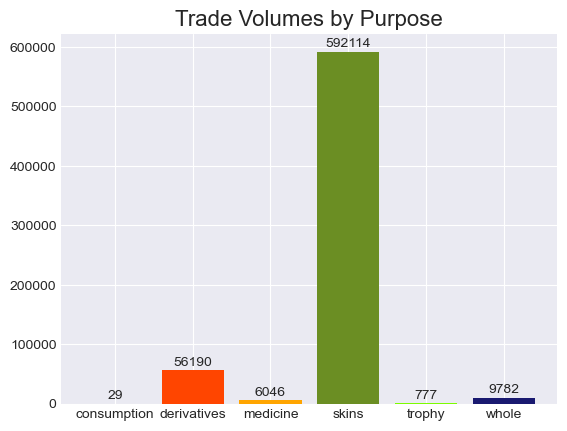

In [493]:
# Save value of totals by purpose
total_pur = CITES_pur.groupby(['Purpose']).sum()

# Set an offset to lift the label above the bar
offset = 8000

# Bar plot of total pangolins poached by purpose
plt.bar(purposes, total_pur, color = colours_pur)
plt.title('Trade Volumes by Purpose', fontsize = 16)

# Add labels to each bar
for i, total in enumerate(total_pur):
  plt.text(total_pur.index[i], total + offset, round(total), ha = 'center')

# Save image
plt.savefig('Images/purposes_bar.png')

Skins and skin products are clearly the largest contributing factor to pangolin trading, accounting for almost all of the demand.  Derivatives also induce a notable level of trade, while the rest of the factors are relatively insignificant.

### Trends Overall

In [494]:
# Group total data by year
total = CITES[['Year', 'Number']]
total = CITES.groupby('Year')['Number'].sum()

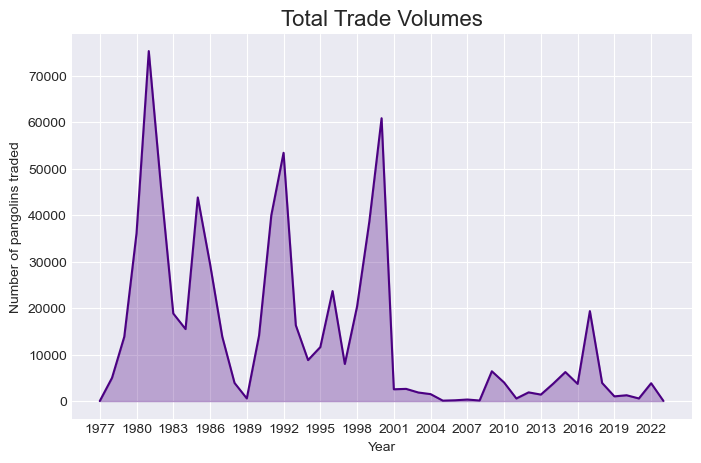

In [495]:
# Plot 
plt.figure(figsize = (8,5))
plt.plot(total, color = 'indigo')
plt.title('Total Trade Volumes', fontsize = 16)
plt.fill_between(total.index, total, color = 'indigo', alpha = 0.3)
plt.xlabel('Year')
plt.ylabel('Number of pangolins traded')
plt.xticks(np.arange(min(total.index), max(total.index)+1, 3))
plt.style.use('seaborn-v0_8-darkgrid')

Once again, we see that the recorded trades have decreased since the introduction of trade restrictions in 2000.  There is still, however, likely to be large volumes of trade occurring unrecorded (IUCN SSC Pangolin Specialist Group, 2016).

In [496]:
# Export the smaller data frame we created
total.to_csv('Datasets/total.csv')

### References

1. IUCN SSC Pangolin Specialist Group. (2016, January 11). THE CONSERVATION STATUS, ILLEGAL TRADE AND USE OF PANGOLINS (MANIS SPP.) - Information Document for the 66th Meeting of the CITES Standing Committee. Retrieved from CITES.org: https://cites.org/sites/default/files/eng/com/sc/66/Inf/E-SC66-Inf-23.pdf